<a href="https://colab.research.google.com/github/YangHyunu/Signiture/blob/main/13_nn_binary_citrus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:00
time: 449 µs (started: 2024-06-28 07:01:41 +00:00)


## NN 이진분류
- 오렌지, 그레이프후루츠 이진분류

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
SEED = 42

time: 7.07 s (started: 2024-06-28 07:01:42 +00:00)


In [ ]:
np.random.seed(SEED) # 주피터 랩에서는 랜덤시드가 같은 셀 에서만 고정됨
np.random.random() , np.random.random()

(0.3745401188473625, 0.9507143064099162)

time: 7.52 ms (started: 2024-06-28 07:01:49 +00:00)


In [ ]:
np.random.random()

0.7319939418114051

time: 11.3 ms (started: 2024-06-28 07:01:49 +00:00)


#데이터 준비
- shell command 에서 !wget 으로 파일 다운로드

In [ ]:
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv

--2024-06-28 07:01:49--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308294 (301K) [text/plain]
Saving to: ‘citrus.csv’

citrus.csv          100%[===================>] 301.07K  --.-KB/s    in 0.03s   

2024-06-28 07:01:49 (9.94 MB/s) - ‘citrus.csv’ saved [308294/308294]

time: 217 ms (started: 2024-06-28 07:01:49 +00:00)


In [ ]:
citrus = pd.read_csv('citrus.csv')
citrus.shape

(10000, 6)

time: 87 ms (started: 2024-06-28 07:01:59 +00:00)


In [ ]:
citrus.head(5)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


time: 218 ms (started: 2024-06-28 07:02:01 +00:00)


In [ ]:
citrus.info() # name 이 response variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
time: 117 ms (started: 2024-06-28 07:02:02 +00:00)


In [ ]:
df=citrus.copy()

time: 2.72 ms (started: 2024-06-28 07:02:03 +00:00)


In [ ]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


time: 173 ms (started: 2024-06-28 07:02:04 +00:00)


## 범주형 변수

In [ ]:
df['name'].unique()

array(['orange', 'grapefruit'], dtype=object)

time: 14.8 ms (started: 2024-06-28 07:02:08 +00:00)


In [ ]:
df['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

time: 8.11 ms (started: 2024-06-28 07:02:08 +00:00)


<Axes: xlabel='name'>

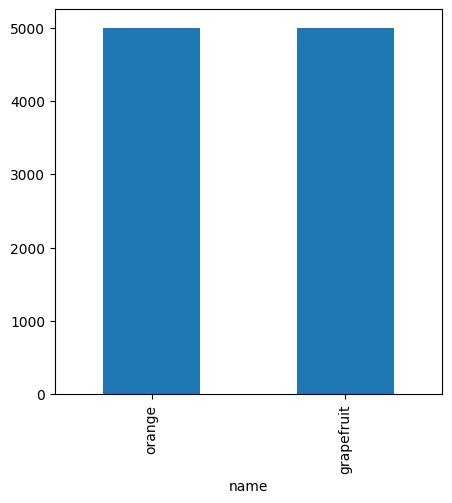

time: 748 ms (started: 2024-06-28 07:02:08 +00:00)


In [ ]:
df['name'].value_counts().plot(kind='bar',figsize=(5,5))

## 연속형 변수

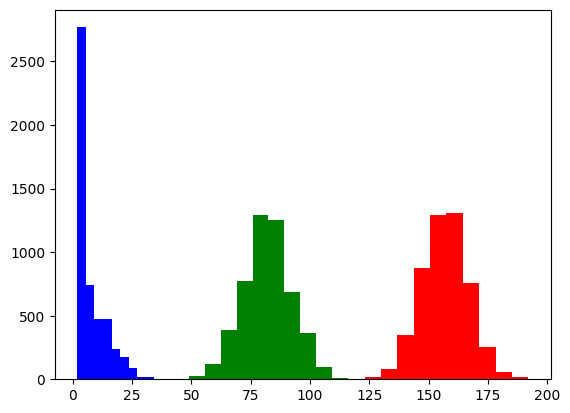

time: 2.77 s (started: 2024-06-28 07:02:11 +00:00)


In [ ]:
df_orange = df[df['name']=='orange']
plt.hist(df_orange['red'],bins=10,color='r')
plt.hist(df_orange['green'],bins=10,color='g')
plt.hist(df_orange['blue'],bins=10,color='b')
plt.show()

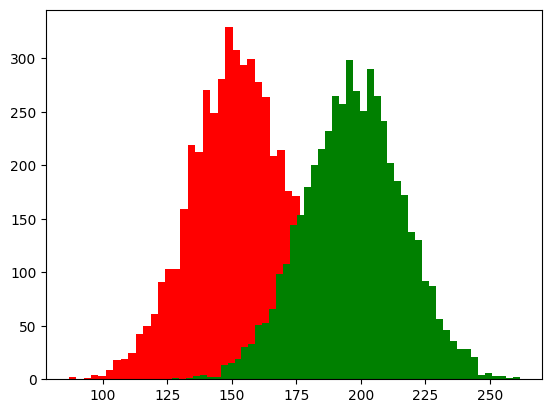

time: 2.06 s (started: 2024-06-28 07:02:19 +00:00)


In [ ]:
df_orange = df[df['name']=='orange']
df_graphe= df[df['name']=='grapefruit']
plt.hist(df_orange['weight'],bins=50,color='r')
plt.hist(df_graphe['weight'],bins=50,color='g')
plt.show()

In [ ]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

time: 28.2 ms (started: 2024-06-28 07:02:21 +00:00)


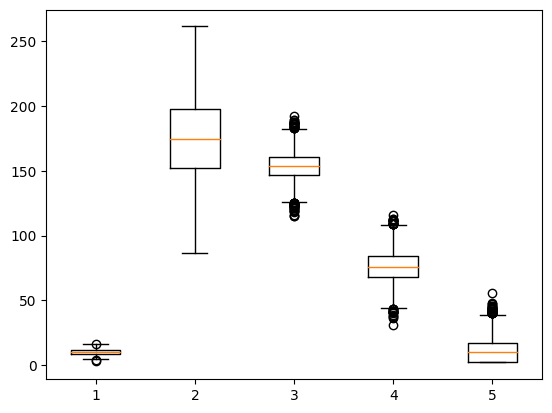

time: 617 ms (started: 2024-06-28 07:02:21 +00:00)


In [ ]:
plt.boxplot(df[['diameter', 'weight', 'red', 'green', 'blue']])
plt.show()

## 결측치(Missing Value)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df.isna().sum(axis=0) # Default: axis=0

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

## 중복값

In [ ]:
df.duplicated().sum()

0

## 2. 데이터 스플릿

In [ ]:
df = df.sample(frac=1,random_state=SEED) # 데이터가 0~4999까지 오렌지 나머지 포도라 데이터를 섞을 필요가 있다.

In [ ]:
df.head()

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2


## 데이터 셋 분리

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size=0.2,shuffle=True,random_state=SEED)
df_train.shape, df_test.shape

((8000, 6), (2000, 6))

time: 307 ms (started: 2024-06-28 07:05:12 +00:00)


## X,y 변수 분리

In [ ]:
y_train=df_train['name']
X_train=df_train.drop('name',axis=1)

time: 3.42 ms (started: 2024-06-28 07:05:34 +00:00)


## 스케일링

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_s= rs.fit_transform(X_train)
X_train_s.shape

(8000, 5)

time: 38.6 ms (started: 2024-06-28 07:08:40 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y_train_e =le.fit_transform(y_train)
y_train_e , y_train_e.shape

(array([0, 1, 1, ..., 0, 1, 0]), (8000,))

time: 9.39 ms (started: 2024-06-28 07:09:34 +00:00)


In [ ]:
print(X_train_s.shape, y_train_e.shape)
print(type(X_train_s),type(y_train_e))

(8000, 5) (8000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 5.34 ms (started: 2024-06-28 07:09:55 +00:00)


## 모델 적합

In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=5,activation='relu',input_shape=(5,)),
    layers.Dense(units=3,activation='relu'),
    layers.Dense(units=1,activation='sigmoid'),

])

time: 456 ms (started: 2024-06-28 07:11:02 +00:00)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 52 (208.00 Byte)
Trainable params: 52 (208.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 50.1 ms (started: 2024-06-28 07:11:36 +00:00)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam',
 metrics=['accuracy'])

time: 42.4 ms (started: 2024-06-28 07:11:47 +00:00)


In [ ]:
EPOCHS=100
BATCH_SIZE=16
history= model.fit(X_train_s,y_train_e,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.2
          )

Epoch 1/100
400/400 [==============================] - 2s 2ms/step - loss: 0.4641 - accuracy: 0.8420 - val_loss: 0.2757 - val_accuracy: 0.9187
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 0.2139 - accuracy: 0.9234 - val_loss: 0.2005 - val_accuracy: 0.9256
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1851 - accuracy: 0.9269 - val_loss: 0.1921 - val_accuracy: 0.9237
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 0.1812 - accuracy: 0.9275 - val_loss: 0.1893 - val_accuracy: 0.9237
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 0.1792 - accuracy: 0.9270 - val_loss: 0.1873 - val_accuracy: 0.9237
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 0.1781 - accuracy: 0.9283 - val_loss: 0.1870 - val_accuracy: 0.9250
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1770 - accuracy: 0.9283 - val_loss: 0.1850 - val_accuracy: 0.9237

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()


time: 1.44 ms (started: 2024-06-28 07:14:10 +00:00)


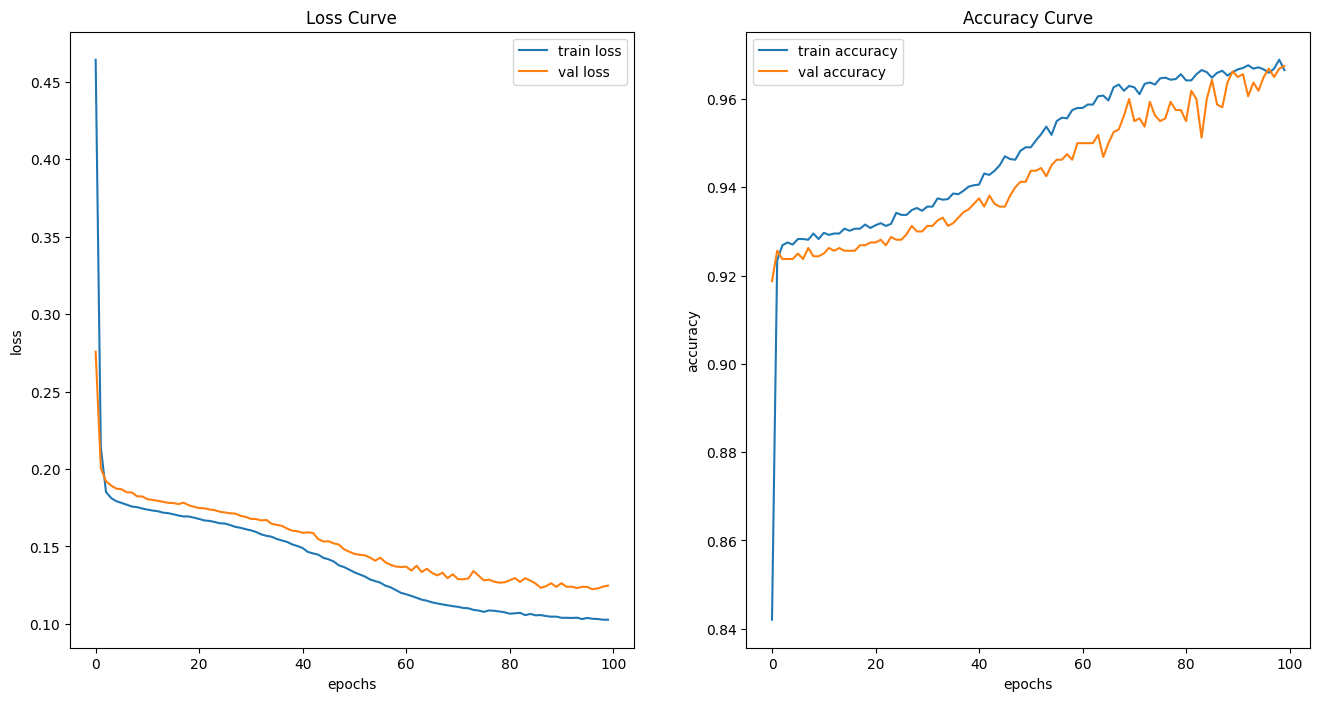

time: 992 ms (started: 2024-06-28 07:14:23 +00:00)


In [ ]:
plot_history(history)

## 모델 검증


In [ ]:
X_test=df_test.drop('name',axis=1)
y_test=df_test['name']

time: 5.2 ms (started: 2024-06-28 07:15:35 +00:00)


In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_test_s= rs.fit_transform(X_test)
X_test_s.shape

(2000, 5)

time: 29.9 ms (started: 2024-06-28 07:16:41 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y_test_e =le.fit_transform(y_test)
y_test_e , y_test_e.shape

(array([0, 1, 1, ..., 0, 1, 0]), (2000,))

time: 13.8 ms (started: 2024-06-28 07:17:04 +00:00)


In [ ]:
print(X_test_s.shape, y_test_e.shape)
print(type(X_test_s),type(y_test_e))

(2000, 5) (2000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 919 µs (started: 2024-06-28 07:17:52 +00:00)


In [ ]:
y_pred = model.predict(X_test_s)

63/63 [==============================] - 0s 2ms/step
time: 454 ms (started: 2024-06-28 07:18:12 +00:00)


In [ ]:
y_pred
y_pred=(y_pred>0.5).astype(int).reshape(-1)
# (y_pred>0.5).astype(int).shape

time: 1.11 ms (started: 2024-06-28 07:18:27 +00:00)


In [ ]:
y_pred

array([0, 1, 1, ..., 0, 1, 0])

time: 15.3 ms (started: 2024-06-28 07:18:35 +00:00)


In [ ]:
y_test_e

array([0, 1, 1, ..., 0, 1, 0])

time: 9.16 ms (started: 2024-06-28 07:18:46 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred,aver='binary'):
  print('accuracy',accuracy_score(y_true,y_pred))
  print('recall',recall_score(y_true,y_pred,average=aver))
  print('precision',precision_score(y_true,y_pred,average=aver))
  print('f1_score',f1_score(y_true,y_pred, average=aver))

  cfm = confusion_matrix(y_true,y_pred)
  s = sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
  s.set(xlabel='Actual',ylabel='Prediction')
  plt.show()

time: 1.39 ms (started: 2024-06-28 07:19:00 +00:00)


accuracy 0.967
recall 0.941699604743083
precision 0.9927083333333333
f1_score 0.9665314401622718


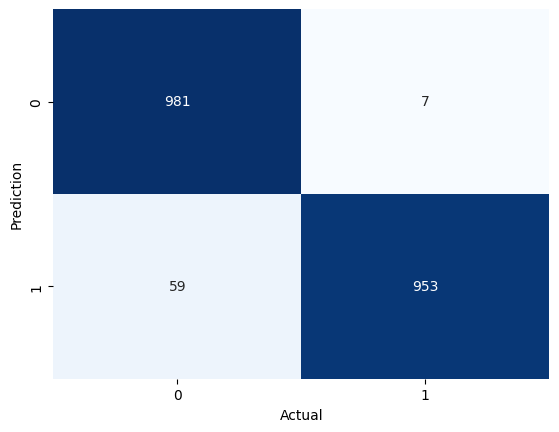

time: 384 ms (started: 2024-06-28 07:19:09 +00:00)


In [ ]:
print_metrics(y_test_e,y_pred)